Introdution




....

# Importing Library

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree      
from sklearn.model_selection import train_test_split  
from sklearn import metrics                          
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
sns.set()

After downloading my entire library, which I will use throughout my analyse, I also download my archive which I will call student_data_df, with the file downloaded, I'll get the first information.

In [2]:
student_data_df = pd.read_csv('student_data.csv')

In [3]:
student_data_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773.0,1,1,125.0,1,1,1.0,...,0,6.0,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773.0,1,1,120.0,105,1,1.0,...,0,6.0,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500.0,1,1,154.0,1,37,37.0,...,0,8.0,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147.0,1,1,180.0,1,37,37.0,...,0,5.0,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Cleaning Dataset

At first look, we can see that it is a very large file with 4424 rowns and 37 columns. Analyzing the columns, I see that many of them do not have a direct link with the purpose of the study. So, to begin with, I need to identify which columns will be important for my analysis. So I decide to clean up the columns first, deleting the possibility of duplicates for example.

In [4]:
student_data_df=student_data_df.drop_duplicates()
student_data_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773.0,1,1,125.0,1,1,1.0,...,0,6.0,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773.0,1,1,120.0,105,1,1.0,...,0,6.0,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500.0,1,1,154.0,1,37,37.0,...,0,8.0,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147.0,1,1,180.0,1,37,37.0,...,0,5.0,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


No duplicates found, so I need to delete the columns that don't link to the study and with this, decrease the time spent cleaning up data that I won't be using in the future. Thus, I identified the following columns as not being important for this study, I used the .drop(columns = "Columns name") function to delete this column from my datset.

In [5]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (without evaluations)")

In [6]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (grade)")

In [7]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (approved)")

In [8]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (evaluations)")

In [9]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (enrolled)")

In [10]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (credited)")

In [11]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (without evaluations)")

In [12]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (grade)")

In [13]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (approved)")

In [14]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (evaluations)")

In [15]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (enrolled)")

In [16]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (credited)") 

In [17]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1,1,0,20,0.0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0,1,0,19,0.0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0,1,0,19,0.0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1,0,0,20,0.0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1,0,0,45,0.0,13.9,-0.3,0.79,Graduate


In [18]:
student_data_df.shape

(4424, 25)

To understand the size of the dataset and its structure now, I use the function .shape() and so I get the result that now my dataset has 4424 rows and 25 columns.

In [19]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  4424 non-null   object 
 1   Application mode                4424 non-null   int64  
 2   Application order               4424 non-null   int64  
 3   Course                          4423 non-null   float64
 4   Daytime/evening attendance      4424 non-null   int64  
 5   Previous qualification          4424 non-null   int64  
 6   Previous qualification (grade)  4424 non-null   float64
 7   Nacionality                     4424 non-null   int64  
 8   Mother's qualification          4424 non-null   int64  
 9   Father's qualification          4423 non-null   float64
 10  Mother's occupation             4424 non-null   int64  
 11  Father's occupation             4424 non-null   int64  
 12  Admission grade                 44

This is a function that provides a summary of the Dataset information. It displays a lot of useful information about the dataset, including: the name of each column, the data type of each column, the number of non-null values in each column, the memory usage of the dataset.

In [20]:
student_data_df.isnull().sum()

Marital status                    0
Application mode                  0
Application order                 0
Course                            1
Daytime/evening attendance        0
Previous qualification            0
Previous qualification (grade)    0
Nacionality                       0
Mother's qualification            0
Father's qualification            1
Mother's occupation               0
Father's occupation               0
Admission grade                   1
Displaced                         0
Educational special needs         0
Debtor                            1
Tuition fees up to date           1
Gender                            0
Scholarship holder                0
Age at enrollment                 0
International                     1
Unemployment rate                 0
Inflation rate                    0
GDP                               0
Target                            0
dtype: int64

With .isnull().sum(), I can check in each column have non-null values!

In [21]:
student_data_df.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,Gender,Scholarship holder,International,Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,10.960895,11.032324,126.984219,0.011528,0.113724,0.351718,0.248418,0.024870,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,26.418253,25.263040,14.477954,0.106760,0.317511,0.477560,0.432144,0.155746,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,0.000000,0.000000,0.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,0.000000,0.000000,1.000000,0.000000,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.200000,3.700000,3.510000


According to pandas Guide, "Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided." (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Knowing this, mean stands for average value of a set of numbers, min and max is minimum and maximum respectively and std provides a measure of how much the values in a dataset deviate from the mean.


# Non-null values

Knowing this, time to clean the dataset, and I started showing columns by columns each non-null values they have, or not have, using the function .unique()

In [22]:
student_data_df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

In [23]:
student_data_df["Application mode"].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27], dtype=int64)

In [24]:
student_data_df["Application order"].unique()

array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

In [25]:
student_data_df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.,   nan])

In [26]:
student_data_df["Daytime/evening attendance"].unique()

array([1, 0], dtype=int64)

In [27]:
student_data_df["Previous qualification"].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14],
      dtype=int64)

In [28]:
student_data_df["Previous qualification (grade)"].unique()

array([122. , 160. , 100. , 133.1, 142. , 119. , 137. , 138. , 139. ,
       136. , 133. , 110. , 149. , 127. , 135. , 140. , 125. , 126. ,
       151. , 115. , 150. , 143. , 130. , 120. , 103. , 154. , 132. ,
       167. , 129. , 141. , 116. , 148. , 118. , 106. , 121. , 114. ,
       124. , 123. , 113. , 111. , 131. , 158. , 146. , 117. , 153. ,
       178. ,  99. , 134. , 128. , 170. , 155. , 145. , 152. , 112. ,
       107. , 156. , 188. ,  96. , 161. , 166. , 147. , 144. , 102. ,
       101. , 180. , 172. , 105. , 108. , 165. , 190. , 162. , 164. ,
       163. , 159. , 117.4, 175. , 133.8, 176. , 168. , 139.3,  97. ,
       157. , 140.8, 184.4, 148.9, 109. , 174. , 182. , 138.6,  95. ,
       154.4, 163.3, 145.7, 123.9, 124.4, 169. , 177. , 138.7, 119.1,
       118.9, 126.6])

In [29]:
student_data_df["Nacionality"].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17], dtype=int64)

In [30]:
student_data_df["Mother's qualification"].unique()

array([19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44], dtype=int64)

In [31]:
student_data_df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       nan, 36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18.,
       42., 10.,  6., 30., 25., 44., 33., 27., 31.])

In [32]:
student_data_df["Mother's occupation"].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153], dtype=int64)

In [33]:
student_data_df["Father's occupation"].unique()

array([  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90,
       175, 121,  99, 144, 195, 192, 161, 193, 151, 182, 132, 131, 194,
       163, 135, 143, 171, 103, 172, 152, 183, 122, 102, 181, 134, 123,
       112, 153, 174, 141, 114, 101, 154], dtype=int64)

In [34]:
student_data_df["Admission grade"].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

In [35]:
student_data_df["Displaced"].unique()

array(['1', '0', '?'], dtype=object)

In [36]:
student_data_df["Educational special needs"].unique()

array([0, 1], dtype=int64)

In [37]:
student_data_df["Debtor"].unique()

array([ 0.,  1., nan])

In [38]:
student_data_df["Tuition fees up to date"].unique()

array(['1', '0', nan, '?'], dtype=object)

In [39]:
student_data_df["Gender"].unique()

array([1, 0], dtype=int64)

In [40]:
student_data_df["Scholarship holder"].unique()

array([0, 1], dtype=int64)

In [41]:
student_data_df["Age at enrollment"].unique()

array(['20', '19', '45', '50', '18', '22', '21', '34', '37', '43', '55',
       '39', '29', '24', '27', '23', '26', '33', '35', '25', '44', '36',
       '47', '28', '38', 'UnKnown', '30', '31', '32', '40', '42', '48',
       '49', '46', '41', '70', '60', '53', '51', '52', '54', '61', '58',
       '59', '17', '57', '62'], dtype=object)

In [42]:
student_data_df["International"].unique()

array([ 0.,  1., nan])

In [43]:
student_data_df["Unemployment rate"].unique()

array([10.8, 13.9,  9.4, 16.2, 15.5,  8.9, 12.7, 11.1,  7.6, 12.4])

In [44]:
student_data_df["Inflation rate"].unique()

array([ 1.4, -0.3, -0.8,  0.3,  2.8,  3.7,  0.6,  2.6,  0.5])

In [45]:
student_data_df["GDP"].unique()

array([ 1.74,  0.79, -3.12, -0.92, -4.06,  3.51, -1.7 ,  2.02,  0.32,
        1.79])

In [46]:
student_data_df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

# Covert and fill functions

I identify the columns: Marital status, Course, Father's qualification, Admission grade, Displaced, Debtor, Tuition fees up to date, Age at enrollment, International and Target.

First I use pd.to_numeric(student_data_df["Columns Name"], errors="coerce") to convert the values that column of my dataframe to numeric type, and with any errors in Nan, using the coerced.

Doing that, I created a new function to replace Nan with the minimum of each column, and used the function .fillna() to apply the new tool.

And checked if did work, using again the function .unique()


In [47]:
student_data_df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

In [48]:
student_data_df["Marital status"]=pd.to_numeric(student_data_df["Marital status"], errors="coerce")

In [49]:
student_data_df_min_Marital_status = student_data_df["Marital status"].min()
student_data_df_min_Marital_status

1.0

In [50]:
student_data_df["Marital status"]=student_data_df["Marital status"].fillna(student_data_df_min_Marital_status)

In [51]:
student_data_df["Marital status"].unique()

array([1., 2., 4., 3., 5., 6.])

In [52]:
student_data_df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.,   nan])

In [53]:
student_data_df["Course"]=pd.to_numeric(student_data_df["Course"], errors="coerce")

In [54]:
student_data_df_min_Course = student_data_df["Course"].min()
student_data_df_min_Course

33.0

In [55]:
student_data_df["Course"]=student_data_df["Course"].fillna(student_data_df_min_Course)

In [56]:
student_data_df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.])

In [57]:
student_data_df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       nan, 36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18.,
       42., 10.,  6., 30., 25., 44., 33., 27., 31.])

In [58]:
student_data_df["Father's qualification"]=pd.to_numeric(student_data_df["Father's qualification"], errors="coerce")

In [59]:
student_data_df_min_Fathers_qualification = student_data_df["Father's qualification"].min()
student_data_df_min_Fathers_qualification

1.0

In [60]:
student_data_df["Father's qualification"]=student_data_df["Father's qualification"].fillna(student_data_df_min_Fathers_qualification)

In [61]:
student_data_df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18., 42.,
       10.,  6., 30., 25., 44., 33., 27., 31.])

In [62]:
student_data_df["Admission grade"].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

In [63]:
student_data_df["Admission grade"]=pd.to_numeric(student_data_df["Admission grade"], errors="coerce")

In [64]:
student_data_df_min_Admission_grade = student_data_df["Admission grade"].min()
student_data_df_min_Admission_grade

95.0

In [65]:
student_data_df["Admission grade"]=student_data_df["Admission grade"].fillna(student_data_df_min_Admission_grade)

In [66]:
student_data_df["Admission grade"].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

In [67]:
student_data_df["Displaced"].unique()

array(['1', '0', '?'], dtype=object)

In [68]:
student_data_df["Displaced"]=pd.to_numeric(student_data_df["Displaced"], errors="coerce")

In [69]:
student_data_df_min_Displaced = student_data_df["Displaced"].min()
student_data_df_min_Displaced

0.0

In [70]:
student_data_df["Displaced"]=student_data_df["Displaced"].fillna(student_data_df_min_Displaced)

In [71]:
student_data_df["Displaced"].unique()

array([1., 0.])

In [72]:
student_data_df["Debtor"].unique()

array([ 0.,  1., nan])

In [73]:
student_data_df["Debtor"]=pd.to_numeric(student_data_df["Debtor"], errors="coerce")

In [74]:
student_data_df_min_Debtor = student_data_df["Debtor"].min()
student_data_df_min_Debtor

0.0

In [75]:
student_data_df["Debtor"]=student_data_df["Debtor"].fillna(student_data_df_min_Debtor)

In [76]:
student_data_df["Debtor"].unique()

array([0., 1.])

In [77]:
student_data_df["Tuition fees up to date"].unique()

array(['1', '0', nan, '?'], dtype=object)

In [78]:
student_data_df["Tuition fees up to date"]=pd.to_numeric(student_data_df["Tuition fees up to date"], errors="coerce")

In [79]:
student_data_df_min_Tuition_fees_up_to_date = student_data_df["Tuition fees up to date"].min()
student_data_df_min_Tuition_fees_up_to_date

0.0

In [80]:
student_data_df["Tuition fees up to date"]=student_data_df["Tuition fees up to date"].fillna(student_data_df_min_Tuition_fees_up_to_date)

In [81]:
student_data_df["Tuition fees up to date"].unique()

array([1., 0.])

In [82]:
student_data_df["Age at enrollment"].unique()

array(['20', '19', '45', '50', '18', '22', '21', '34', '37', '43', '55',
       '39', '29', '24', '27', '23', '26', '33', '35', '25', '44', '36',
       '47', '28', '38', 'UnKnown', '30', '31', '32', '40', '42', '48',
       '49', '46', '41', '70', '60', '53', '51', '52', '54', '61', '58',
       '59', '17', '57', '62'], dtype=object)

In [83]:
student_data_df["Age at enrollment"]=pd.to_numeric(student_data_df["Age at enrollment"], errors="coerce") 

In [84]:
student_data_df["Age at enrollment"].unique()

array([20., 19., 45., 50., 18., 22., 21., 34., 37., 43., 55., 39., 29.,
       24., 27., 23., 26., 33., 35., 25., 44., 36., 47., 28., 38., nan,
       30., 31., 32., 40., 42., 48., 49., 46., 41., 70., 60., 53., 51.,
       52., 54., 61., 58., 59., 17., 57., 62.])

In [85]:
student_data_df_min_Age_at_enrollment = student_data_df["Age at enrollment"].min()
student_data_df_min_Age_at_enrollment

17.0

In [86]:
student_data_df["Age at enrollment"]=student_data_df["Age at enrollment"].fillna(student_data_df_min_Age_at_enrollment)

In [87]:
student_data_df["Age at enrollment"].unique()

array([20., 19., 45., 50., 18., 22., 21., 34., 37., 43., 55., 39., 29.,
       24., 27., 23., 26., 33., 35., 25., 44., 36., 47., 28., 38., 17.,
       30., 31., 32., 40., 42., 48., 49., 46., 41., 70., 60., 53., 51.,
       52., 54., 61., 58., 59., 57., 62.])

In [88]:
student_data_df["International"].unique()

array([ 0.,  1., nan])

In [89]:
student_data_df["International"]=pd.to_numeric(student_data_df["International"], errors="coerce")

In [90]:
student_data_df_min_International = student_data_df["International"].min()
student_data_df_min_International

0.0

In [91]:
student_data_df["International"]=student_data_df["International"].fillna(student_data_df_min_International)

In [92]:
student_data_df["International"].unique()

array([0., 1.])

# Replace function

For the column Target we have diferent value that mean the same thing, for exemple Grad means Graduate. For clean that, we need to replace the values using the function .replace(). And by setting inplace=True, the changes are applied directly to the DataFrame without requiring reassignment.

In [93]:
student_data_df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

In [94]:
student_data_df["Target"].replace("Grad", "Graduate", inplace = True)

In [95]:
student_data_df["Target"].replace("graduate", "Graduate", inplace = True)

In [96]:
student_data_df["Target"].replace("Drop", "Dropout", inplace = True)

In [97]:
student_data_df["Target"].replace("dropout", "Dropout", inplace = True)

In [98]:
student_data_df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [99]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79,Graduate


# Rename Function

Applying one more time the function .head(), notice some / and () in my columns names, dicided rename my columns so I do not have any problems in future steps of my analyse.

In [100]:
student_data_df = student_data_df.rename(columns={"Daytime/evening attendance": "Daytime Evening Attendance"})
student_data_df = student_data_df.rename(columns={"Previous qualification (grade)": "Previous qualification grade"})
                                                  
print(student_data_df)


      Marital status  Application mode  Application order  Course  \
0                1.0                17                  5   171.0   
1                1.0                15                  1  9254.0   
2                1.0                 1                  5  9070.0   
3                1.0                17                  2  9773.0   
4                2.0                39                  1  8014.0   
...              ...               ...                ...     ...   
4419             1.0                 1                  6  9773.0   
4420             1.0                 1                  2  9773.0   
4421             1.0                 1                  1  9500.0   
4422             1.0                 1                  1  9147.0   
4423             1.0                10                  1  9773.0   

      Daytime Evening Attendance  Previous qualification  \
0                              1                       1   
1                              1                   

In [101]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital status                4424 non-null   float64
 1   Application mode              4424 non-null   int64  
 2   Application order             4424 non-null   int64  
 3   Course                        4424 non-null   float64
 4   Daytime Evening Attendance    4424 non-null   int64  
 5   Previous qualification        4424 non-null   int64  
 6   Previous qualification grade  4424 non-null   float64
 7   Nacionality                   4424 non-null   int64  
 8   Mother's qualification        4424 non-null   int64  
 9   Father's qualification        4424 non-null   float64
 10  Mother's occupation           4424 non-null   int64  
 11  Father's occupation           4424 non-null   int64  
 12  Admission grade               4424 non-null   float64
 13  Dis

In [102]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime Evening Attendance,Previous qualification,Previous qualification grade,Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79,Graduate


In [103]:
print('Target')
student_data_df['Target'].head()

Target


0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

# Checking dataset

After all the cleaning done on my dataset, I now have a better visualization of my data. I still have the Target column as being of type Object, which at first, made me think that I needed to use the pd.to_numeric() function to transform it into numbers, but this will be done later, because keeping it as an object, it does not modify my data in the next step which is the PCA.








In [104]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime Evening Attendance,Previous qualification,Previous qualification grade,Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79,Graduate


In [105]:
student_data_df.isnull().sum()

Marital status                  0
Application mode                0
Application order               0
Course                          0
Daytime Evening Attendance      0
Previous qualification          0
Previous qualification grade    0
Nacionality                     0
Mother's qualification          0
Father's qualification          0
Mother's occupation             0
Father's occupation             0
Admission grade                 0
Displaced                       0
Educational special needs       0
Debtor                          0
Tuition fees up to date         0
Gender                          0
Scholarship holder              0
Age at enrollment               0
International                   0
Unemployment rate               0
Inflation rate                  0
GDP                             0
Target                          0
dtype: int64

I use the isnull().sum() function to check one last time for the presence of non-null values and then go to the PCA

In [106]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital status                4424 non-null   float64
 1   Application mode              4424 non-null   int64  
 2   Application order             4424 non-null   int64  
 3   Course                        4424 non-null   float64
 4   Daytime Evening Attendance    4424 non-null   int64  
 5   Previous qualification        4424 non-null   int64  
 6   Previous qualification grade  4424 non-null   float64
 7   Nacionality                   4424 non-null   int64  
 8   Mother's qualification        4424 non-null   int64  
 9   Father's qualification        4424 non-null   float64
 10  Mother's occupation           4424 non-null   int64  
 11  Father's occupation           4424 non-null   int64  
 12  Admission grade               4424 non-null   float64
 13  Dis

The next step is creates a dataset X with 4424 data points, where each data point has 2 features. It uses a specific method to generate random numbers and combines them to form the dataset. This ensures that every time you run the code, you get the same dataset.

In [144]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,4424)).T

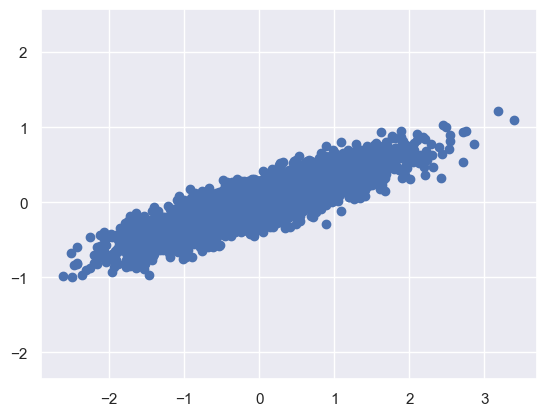

In [108]:
plt.scatter (X[:,0], X[:,1])
plt.axis ("equal");


In Real Python it says: "A scatter plot is a visual representation of how two variables relate to each other. You can use scatter plots to explore the relationship between two variables, for example by looking for any correlation between them." (https://realpython.com/visualizing-python-plt-scatter/)

An important part of working with data is being able to visualize it. The code plt.scatter, simply makes a scatter plot of the dataset X. It ensures that the plot doesn't distort the data by keeping the x and y axes in proportion.

In this case I used plots the 2D dataset X where each data point is represented by a dot and axis (equal), meaning the scale of the x-axis and the y-axis are equal.

# PCA Analysis

Starting with my PCA I'm going to isolate my main Target column for the algorithm to be able to check the variance between the numbers. For that, I use the df.drop(column).

In [109]:
student_data_df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [110]:
student_data_df_no_label=student_data_df.drop(columns=["Target"])

In [111]:
student_data_df_no_label.head()

,Marital status,Application mode,Application order,Course,Daytime Evening Attendance,Previous qualification,Previous qualification grade,Nacionality,Mother's qualification,Father's qualification,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79


## PCA 

In [112]:
from sklearn.decomposition import PCA
pca = PCA().fit(student_data_df_no_label)

Text(0, 0.5, 'cumulative explained variance')

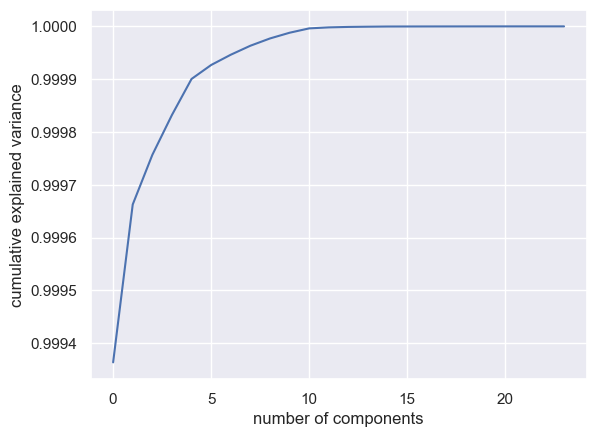

In [113]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

Te code plt.plot creates a plot showing how much of the total variance is explained by including different numbers of components in PCA. The x-axis represents the number of components, and the y-axis represents the cumulative explained variance.

In this case we can see in the grafic that, I need minimum 10 features for retain 99.5% variance in the data.



In [114]:
pca = PCA(10)
projected = pca.fit_transform(student_data_df_no_label)

Knowing that I can use PCA to reduce the dimensionality of the dataset to 10 components, It then transforms the data based on this reduction and stores the result in the projected variable.

In [115]:
projected.shape

(4424, 10)

In [116]:
projected

array([[ 8.68345919e+03, -8.70463479e-01, -1.41923456e+00, ...,
         3.87290621e+00, -3.36679164e+00, -1.29039653e+00],
       [-3.99484170e+02, -1.37283839e+01,  2.87643348e+01, ...,
        -3.93660894e-01, -1.64825552e+00, -3.06339275e+00],
       [-2.15543446e+02, -2.18879040e+00, -8.65741810e+00, ...,
        -1.71461803e-01,  9.14457124e-01,  5.55173783e-01],
       ...,
       [-6.45507003e+02, -3.05007564e+00, -4.29021279e+00, ...,
         1.87813276e+00, -3.37097923e-02, -6.52985979e-01],
       [-2.92486266e+02, -8.15910771e+00,  4.49521244e-01, ...,
        -7.33294016e+00, -2.65830409e-01, -2.26980880e+00],
       [-9.18505885e+02, -5.80106520e+00, -7.40588622e+00, ...,
         4.64641274e+00,  1.61326527e-01,  2.02329053e+01]])

This array contains the transformed data after applying PCA. Each row represents a data point, and each column represents a different component. These values are the coordinates of the data points in a reduced-dimensional space determined by PCA.

In [117]:
student_data_df_pca = pd.DataFrame(projected, columns=["C1", "C2", "C3", "C4","C5","C6", "C7", "C8", "C9", "C10"])

I create new columns in my DataFrame, and each column corresponds to a principal component obtained from the PCA process. So, my columns are C1 to C10, with each row in the DataFrame represents a data point's coordinates in the reduced-dimensional space after applying PCA.

Applying pca.head() I have the result of this process.

In [118]:
student_data_df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,8683.459186,-0.870463,-1.419235,-5.977424,-14.921609,6.705531,4.853305,3.872906,-3.366792,-1.290397
1,-399.484170,-13.728384,28.764335,22.795599,14.755205,1.388506,-12.464627,-0.393661,-1.648256,-3.063393
2,-215.543446,-2.188790,-8.657418,-27.050026,9.728579,1.952056,8.391802,-0.171462,0.914457,0.555174
3,-918.553035,-9.001721,-18.528920,-18.678609,1.446520,2.180258,2.608002,0.796880,1.255379,-0.088672
4,840.433075,-0.098459,-36.634672,-0.087040,-8.164718,3.923116,23.083734,27.406870,2.387681,0.651746


The next code copies the "Target" column from student_data_df to student_data_df_pca, adding it as a new column. Its basically putting the columns back to the analises.

In [119]:
student_data_df_pca["Target"]=student_data_df["Target"]

In [120]:
student_data_df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Target
0,8683.459186,-0.870463,-1.419235,-5.977424,-14.921609,6.705531,4.853305,3.872906,-3.366792,-1.290397,Dropout
1,-399.484170,-13.728384,28.764335,22.795599,14.755205,1.388506,-12.464627,-0.393661,-1.648256,-3.063393,Graduate
2,-215.543446,-2.188790,-8.657418,-27.050026,9.728579,1.952056,8.391802,-0.171462,0.914457,0.555174,Dropout
3,-918.553035,-9.001721,-18.528920,-18.678609,1.446520,2.180258,2.608002,0.796880,1.255379,-0.088672,Graduate
4,840.433075,-0.098459,-36.634672,-0.087040,-8.164718,3.923116,23.083734,27.406870,2.387681,0.651746,Graduate


In [121]:
student_data_df_array = student_data_df_pca.values

In [122]:
student_data_df_array

array([[8683.459185709082, -0.870463478737331, -1.4192345560618662, ...,
        -3.3667916439319168, -1.290396529020681, 'Dropout'],
       [-399.4841703558839, -13.728383923995523, 28.76433476571061, ...,
        -1.6482555200257392, -3.063392746174771, 'Graduate'],
       [-215.54344609589538, -2.188790399002526, -8.657418098775853, ...,
        0.9144571240193877, 0.5551737828073676, 'Dropout'],
       ...,
       [-645.5070027832461, -3.050075643515639, -4.290212786816136, ...,
        -0.03370979231646015, -0.652985978662221, 'Dropout'],
       [-292.4862655984378, -8.15910770983163, 0.4495212439486087, ...,
        -0.2658304086302327, -2.269808796655786, 'Graduate'],
       [-918.5058853397625, -5.8010652037557575, -7.405886224937079, ...,
        0.16132652682775284, 20.232905284163873, 'Graduate']],
      dtype=object)

And the results for my dataset array I got all the dataset PCA values. 

In [123]:
from sklearn.model_selection import train_test_split
X = student_data_df_array[:,0:10]
y = student_data_df_array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In this step of my analyse, I will use train_test_split function, to split my data into training and validation, separate arrays containing features and target variables for both training and validation sets and, to evaluate my model performance on unseen data.


In [124]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [125]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

I dowloaded some more library that I belive will help with my next step and created a list of machine learning models along with their respective configurations.

Doing that, I will use the technique cross-validation, to split into parts for training and testing multiple times. It measures the accuracy of each model in predicting the correct outcome. The results, including the average accuracy and its variability, are printed out for each model.

In [126]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.545354 (0.018361)
LDA: 0.543940 (0.018205)
KNN: 0.514556 (0.021977)
CART: 0.442210 (0.020587)
NB: 0.499574 (0.025125)
SVM: 0.494773 (0.008139)


To understand my results, I need to understand the abbreviations, which according to the book

Linear Regression is a supervised machine learning algorithm. It predicts a linear relationship between an independent variable (y), based on the given dependant variables (x). Such that the independent variable (y) has the lowest cost. (https://towardsdatascience.com/complete-guide-to-linear-regression-in-python-d95175447255)

Linear discriminant analysis is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes. (https://www.statology.org/linear-discriminant-analysis-in-python/)

KNN is a simple and a very effective supervised machine learning algorithm. It belongs to the family of instance-based, non-parametric algorithms, meaning it makes predictions based on the similarity of input data points. KNN basically makes predictions based on the similarity of data points in the sample space. The performance of KNN is basically based on the choice of K. KNN works by memorizing the entire training dataset. When a new data point is given for prediction, KNN looks at the k-nearest data points in the training set based on a specified distance metric (commonly Euclidean distance). (https://www.geeksforgeeks.org/svm-vs-knn-in-machine-learning/)

CART( Classification And Regression Trees) is a  variation of the decision tree algorithm. It can handle both classification and regression tasks. Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train  Decision Trees (also called “growing” trees). (https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/)

A family of algorithms known as “naive Bayes classifiers” use the Bayes Theorem with the strong (naive) presumption that every feature in the dataset is unrelated to every other feature. Naive Bayes classifiers perform very well in a variety of real-world situations despite this simplicity. The Naive Bayes classifier is a probabilistic algorithm based on Bayes’ theorem. It assumes that features are conditionally independent, given the class label. Despite its ‘naive’ assumption, Naive Bayes often performs well in various real-world scenarios. (https://www.geeksforgeeks.org/gaussian-naive-bayes-using-sklearn/)

Support Vector Machine is a effective supervised machine learning algorithm used for classification and regression tasks. The main objective of SVM is to find an optimal hyperplane that best separates the data into different classes in a high-dimensional space. The hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data points (support vectors) of each class. Kernel functions are used for transforming lower dimensional input space to higher dimensional output. (https://www.geeksforgeeks.org/svm-vs-knn-in-machine-learning/)

So we have the results, the first being Mean Accuracy and the second Standard Deviation of each variable.
Accuracy is a measure of the correctness of predictions made by a model and Standard deviation measures the amount of variation or dispersion in a set of values.

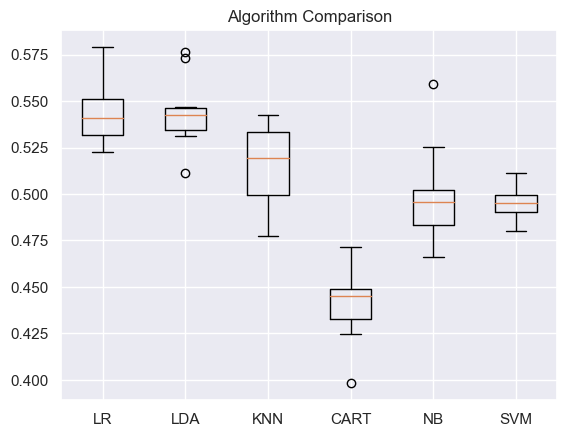

In [145]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

At the top, using the boxplot we can visialize the distribution of results from each algorithm, allowing for a quick comparison of their relative performance. The box plot suggests that the results of the algorithms are predominantly below the value of less than 0.60.

In [128]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [129]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.5344632768361582
[[108   1 165]
 [ 39   2 126]
 [ 80   1 363]]


Taking the Logistic Regression Model, I tested and print score. 
The accuracy is 0.5344, indicating that the model's predictions were correct for around 53.45% of the instances in my dataset.
The result show me an 3x3 matrix, thats represent true positive, false positive, true negative, and false negative.
For the first class, there were 108 true positives, 1 false positive, and 165 false negatives. 
For the second class, there were 2 true positives, 39 false negatives, and 126 false positives. 
For the third class, there were 363 true negatives, 80 false negatives, and 1 false positive.

# LabelEncoder

LabelEnconder is used to convert categorical labels into numerical values. From my cleaning, I still have the column Target that were type Object, and I have Dropout, Graduate, Enrolled as label that need to be changed for numbers.

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
from numpy import asarray

In [132]:
data = asarray([["Dropout"], ["Graduate"], ["Enrolled"]])

In [133]:
data

array([['Dropout'],
       ['Graduate'],
       ['Enrolled']], dtype='<U8')

In [134]:
encoder = LabelEncoder()

In [135]:
result=encoder.fit_transform(data)

C:\Users\denis\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
result

array([0, 2, 1], dtype=int64)

The result shows that my labels are now 0, 1 and 2.

# OneHotEnconder

The OneHotEncoder converts categorical features into a binary matrix where each column represents a unique category, and each row indicates whether that category is present(1) or absent(0).

In [137]:
from sklearn.preprocessing import OneHotEncoder

In [138]:
encoder = OneHotEncoder(sparse=False)

In [139]:
result=encoder.fit_transform(data)

C:\Users\denis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
result

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

And the result is the representation of my matrix.

# VISUALIZATION:

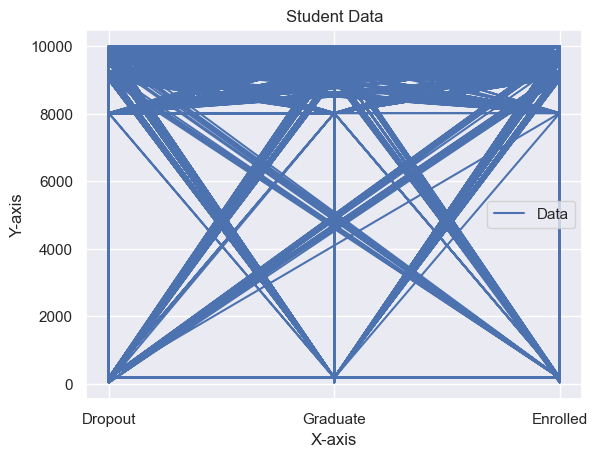

In [142]:
import matplotlib.pyplot as plt

# Example data
x = student_data_df["Target"]
y = student_data_df["Course"]

# Plotting the data
plt.plot(x, y, label='Data')
plt.title('Student Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()



References: 
https://www.geeksforgeeks.org/svm-vs-knn-in-machine-learning/
https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/
https://towardsdatascience.com/complete-guide-to-linear-regression-in-python-d95175447255
https://www.geeksforgeeks.org/gaussian-naive-bayes-using-sklearn/
https://www.statology.org/linear-discriminant-analysis-in-python/
